In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Data Exploration

In [39]:
# Explore the data
# Load the data
data = pd.read_csv('data\\test_Arabic_tweets_positive_20190413.tsv', sep='\t', header=None)
# Print the first 5 rows of the dataframe.
print(data.head())
print('-'*50)
# Print the statistics of the data
print(data.describe())
print('-'*50)
# Check for missing values
print(data.isna().sum())


     0                                                  1
0  pos  #الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
1  pos                               صباحك خيرات ومسرات 🌸
2  pos  #تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
3  pos  😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4  pos  رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...
--------------------------------------------------
           0                                                  1
count   5752                                               5752
unique     1                                               4386
top      pos  بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
freq    5752                                                108
--------------------------------------------------
0    0
1    0
dtype: int64


# Data Preprocessing
##### The data is formated as follows{label, tweet}

In [26]:

# function to get sentence and labels from file
def get_data(file):
    sentences = []
    labels = []
    with open(file, 'r', encoding='utf8') as f:
        tsv_reader = csv.reader(f, delimiter='\t')
        for line in tsv_reader:
            sentences.append(line[1])
            if line[0] == 'pos':
                labels.append(1)
            else:
                labels.append(0)
                
    return sentences, labels


In [29]:
# get the data
train_sentences_pos, train_labels_pos = get_data('data\\train_Arabic_tweets_positive_20190413.tsv')
train_sentences_neg, train_labels_neg = get_data('data\\train_Arabic_tweets_negative_20190413.tsv')
test_sentences_pos, test_labels_pos = get_data('data\\test_Arabic_tweets_positive_20190413.tsv')
test_sentences_neg, test_labels_neg = get_data('data\\test_Arabic_tweets_negative_20190413.tsv')

# combine the data
train_sentences = train_sentences_pos + train_sentences_neg
train_labels = train_labels_pos + train_labels_neg
test_sentences = test_sentences_pos + test_sentences_neg
test_labels = test_labels_pos + test_labels_neg
# shuffle the train data
train_sentences, train_labels = np.array(train_sentences), np.array(train_labels)
train_indices = np.arange(train_sentences.shape[0]) 
np.random.shuffle(train_indices)
train_sentences = train_sentences[train_indices]
train_labels = train_labels[train_indices]
# shuffle the test data
test_sentences, test_labels = np.array(test_sentences), np.array(test_labels)
test_indices = np.arange(test_sentences.shape[0])
np.random.shuffle(test_indices)
test_sentences = test_sentences[test_indices]
test_labels = test_labels[test_indices]

print(f"this is the first five training sentences: {train_sentences[:5]}")
print(f"this is the first five training labels: {train_labels[:5]}")
print(f"this is the first five testing sentences: {test_sentences[:5]}")
print(f"this is the first five testing labels: {test_labels[:5]}")

this is the first five training sentences: ['باسوا يد الحبسي بالمطار وطالبوه بعدم تسجيل #النصر بمرماه واليوم يبوسون شعار #الاتحاد ليعطل النصر ويهديهم الصدارة !!…'
 'واضح عليك التوتر ،، اقراء وش كتبت لكن صدارتك مؤقته افرح فيها 😂'
 '#تسكر لي عيونه #وعيونه الليله #تجاوبني قبل #اشوفه واسأل #يا اطهر ذنب #احبه ذنب #وادعيله لنفس #احيان ما تتقارن ب…'
 'اكيد طبعا يا درش 💖'
 'ياحظنا فيك فعلا والله. 💜💜 أحبك يا صولا كثيير والله 😭 شكرا على الليله الذهبيه ⭐️ #اصاله #اصاله_جلسة_الرياض']
this is the first five training labels: [1 1 0 1 0]
this is the first five testing sentences: ['ألف الحمدالله علي السلامة يالشرير 😂😂'
 'جميل 💙😍 انا كمان نفسى انتقب واهلى مش موافقين خالص ادعيلى 💔 ممكن تطوليه شويه معلش 😂 — ربنا يرزقنا بيه يا غاليه عاجلا…'
 'لا يمكن ان اتعاطف مع اي سعودي من رجال الاعمال قام بالاستعانه بإحانب وسرقوه بل اقول الله يزيدك يا من فضلت الاجنبي اب…'
 'بالله حتى وانت تعلق على الأهلي والهلال ، عطينا وحدة ميرنغي جمييل .. اشتقنا 💔'
 'ما أجمل أن تكونى مثل البحر .. بلا نهاية خارجك هادئ وأنيق .. 🌊 وداخل

In [33]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Tokenize the sentences
def tokenize(sentences, vocab_size, oov_token, trunc_type, padding_type, max_length):
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
    tokenizer.fit_on_texts(sentences)
    word_index = tokenizer.word_index
    sequences = tokenizer.texts_to_sequences(sentences)
    padded = pad_sequences(sequences, padding=padding_type, truncating=trunc_type, maxlen=max_length)
    return sequences, padded, word_index, tokenizer

vocab_size = 10000
oov_token = "<OOV>"
trunc_type = 'post'
padding_type = 'post'
embedding_dim = 16
max_length = 50 # tweets don't usaually exceed 50 words

train_sequences, train_padded, word_index, tokenizer = tokenize(train_sentences, vocab_size, oov_token, trunc_type, padding_type, max_length)

test_padded = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_padded, padding=padding_type, truncating=trunc_type, maxlen=max_length)

print(f"First sentence:\n\n {train_sentences[0]}")
print(f"First sentence tokenized:\n\n {train_sequences[0]}")
print(f"First sentence padded:\n\n {train_padded[0]}")
print(f"padded shape:\n\n {train_padded.shape}")



First sentence:

 باسوا يد الحبسي بالمطار وطالبوه بعدم تسجيل #النصر بمرماه واليوم يبوسون شعار #الاتحاد ليعطل النصر ويهديهم الصدارة !!…
First sentence tokenized:

 [3790, 1326, 3791, 3620, 3792, 1946, 1416, 33, 3793, 845, 3621, 2427, 37, 3794, 33, 3795, 964, 58]
First sentence padded:

 [3790 1326 3791 3620 3792 1946 1416   33 3793  845 3621 2427   37 3794
   33 3795  964   58    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
padded shape:

 (45275, 50)


## Training The Model

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 conv1d (Conv1D)             (None, 46, 32)            2592      
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                      

In [35]:
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/10


1415/1415 - 4s - loss: 0.2858 - accuracy: 0.8687 - val_loss: 0.1804 - val_accuracy: 0.9326 - 4s/epoch - 3ms/step
Epoch 2/10
1415/1415 - 3s - loss: 0.1401 - accuracy: 0.9458 - val_loss: 0.1631 - val_accuracy: 0.9329 - 3s/epoch - 2ms/step
Epoch 3/10
1415/1415 - 3s - loss: 0.1142 - accuracy: 0.9555 - val_loss: 0.1633 - val_accuracy: 0.9396 - 3s/epoch - 2ms/step
Epoch 4/10
1415/1415 - 2s - loss: 0.0978 - accuracy: 0.9631 - val_loss: 0.1633 - val_accuracy: 0.9406 - 2s/epoch - 2ms/step
Epoch 5/10
1415/1415 - 3s - loss: 0.0851 - accuracy: 0.9681 - val_loss: 0.1674 - val_accuracy: 0.9362 - 3s/epoch - 2ms/step
Epoch 6/10
1415/1415 - 3s - loss: 0.0769 - accuracy: 0.9710 - val_loss: 0.1793 - val_accuracy: 0.9393 - 3s/epoch - 2ms/step
Epoch 7/10
1415/1415 - 3s - loss: 0.0696 - accuracy: 0.9740 - val_loss: 0.1879 - val_accuracy: 0.9388 - 3s/epoch - 2ms/step
Epoch 8/10
1415/1415 - 2s - loss: 0.0641 - accuracy: 0.9751 - val_loss: 0.1881 - val_accuracy: 0.9378 - 2s/epoch - 2ms/step
Epoch 

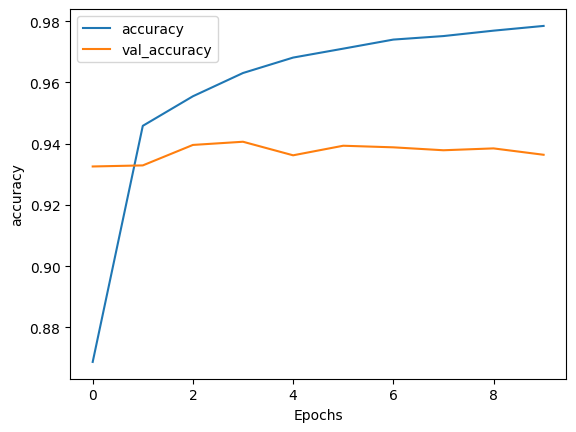

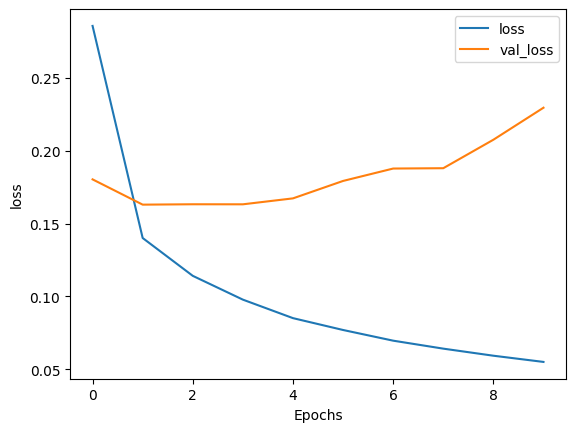

In [36]:
# plot the accuracy and loss
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")